In [1]:
TRAIN_PATH = "/content/drive/MyDrive/CovidDataset/Train" 
VAL_PATH = "/content/drive/MyDrive/CovidDataset/Val"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [3]:
# AlexNet Based Model in Keras

model = Sequential()

model.add(Conv2D(96, kernel_size=(3,3), activation='selu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(LayerNormalization())

model.add(Conv2D(256, (3,3), activation='selu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(LayerNormalization())

model.add(Conv2D(384, (3,3), activation='selu'))

model.add(Conv2D(384, (3,3), activation='selu'))

model.add(Conv2D(256, (3,3), activation='selu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(GlobalAveragePooling2D())
model.add(Dropout(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 96)      2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 96)     0         
 )                                                               
                                                                 
 layer_normalization (LayerN  (None, 111, 111, 96)     192       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 256)     221440    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 256)      0         
 2D)                                                             
                                                        

In [5]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/Train',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 352 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/Val',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 40 images belonging to 2 classes.


In [9]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 60s 6s/step - loss: 19.7572 - accuracy: 0.4922 - val_loss: 4.9778 - val_accuracy: 0.5312
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 5.7202 - accuracy: 0.4766 - val_loss: 6.2016 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 16s 2s/step - loss: 3.4524 - accuracy: 0.5000 - val_loss: 0.8424 - val_accuracy: 0.5625
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 3.5683 - accuracy: 0.4297 - val_loss: 0.8513 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 1.3629 - accuracy: 0.5000 - val_loss: 0.6609 - val_accuracy: 0.5312
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 1.0551 - accuracy: 0.5469 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 1.0533 - accuracy: 0.4922 - val_loss: 0.6716 - val_accuracy: 0.5625
Epoch 8/10
8/8 [==================

In [10]:
# Loss is very less

model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[0.7167532444000244, 0.5]

In [11]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.7139847278594971, 0.5]

In [12]:
model.save("/content/drive/MyDrive/Major Project Models/AlexNet_Model.h5")

In [22]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
def cnn_evaluation(model, history, train_images, train_labels, test_images, test_labels, class_names, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epch = range(1, len(train_acc) + 1)
    plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
    plt.plot(epch, val_acc, 'g', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epch, train_loss, 'r.', label='Training loss')
    plt.plot(epch, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
trainImagesX = '/content/drive/MyDrive/CovidDataset/Train/Covid'
trainImagesY = '/content/drive/MyDrive/CovidDataset/Train/Normal'

testImagesX = '/content/drive/MyDrive/CovidDataset/Val/Covid'
testImagesY = '/content/drive/MyDrive/CovidDataset/Val/Normal'

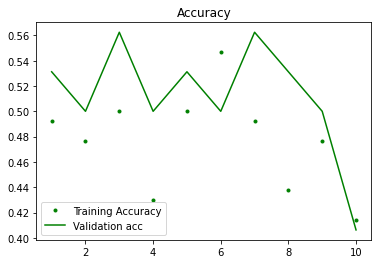

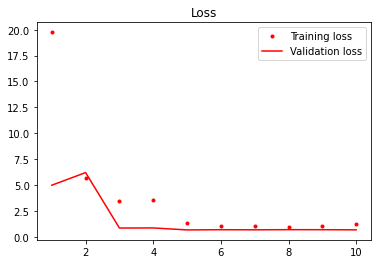

In [28]:
cnn_evaluation(model, hist, trainImagesX, trainImagesY, testImagesX, testImagesY, class_names=['covid', 'no findings'])

In [29]:
# Test Images

y_actual = []
y_test = []

In [30]:
import os

In [31]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Normal/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Val/Normal/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  classes_x=np.argmax(p, axis=1)
  y_test.append(p[0, 0])
  y_actual.append(1)

In [33]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Covid/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Val/Covid/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  classes_x=np.argmax(p, axis=1)
  y_test.append(p[0, 0])
  y_actual.append(0)

In [34]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [35]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [37]:
cm = confusion_matrix(y_actual, y_test)

In [38]:
import seaborn as sns

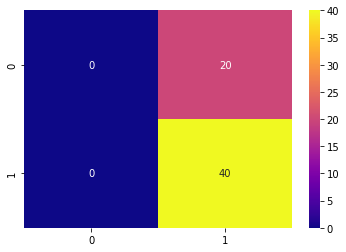

In [39]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [40]:
cm

array([[ 0, 20],
       [ 0, 40]])